In [42]:
import os 
import pandas as pd

In [43]:
images = []
ages = []
genders = []
races = []
for i in os.listdir('UTKFace'):
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    races.append(int(split[2]))
    images.append(f'UTKFace/{i}')
ages[0]

100

In [44]:

df = pd.DataFrame({'Images' : images , 'Ages' : ages , 'Genders' : genders , 'Races' : races})
df.head()

,Images,Ages,Genders,Races
0,UTKFace/100_0_0_20170112213500903.jpg.chip.jpg,100,0,0
1,UTKFace/100_0_0_20170112215240346.jpg.chip.jpg,100,0,0
2,UTKFace/100_1_0_20170110183726390.jpg.chip.jpg,100,1,0
3,UTKFace/100_1_0_20170112213001988.jpg.chip.jpg,100,1,0
4,UTKFace/100_1_0_20170112213303693.jpg.chip.jpg,100,1,0


In [46]:
df = df[(df['Races'] != 4) & (df['Races'] != 3) & (df['Races'] != 2)].copy()
df.shape

(14604, 4)

In [47]:
df.to_csv('Images.csv' , index=False)

<Axes: ylabel='Genders'>

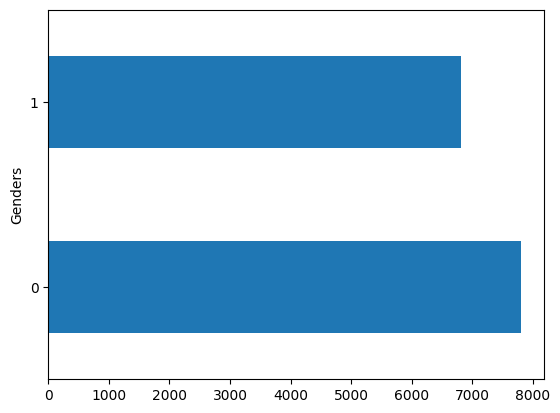

In [48]:

race_counts = df['Genders'].value_counts()

race_counts.plot(kind='barh')


In [49]:

# [age] is an integer from 0 to 116, indicating the age
# [gender] is either 0 (male) or 1 (female)
# [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

In [50]:
# df = df[df['Ages'] <= 90].copy()

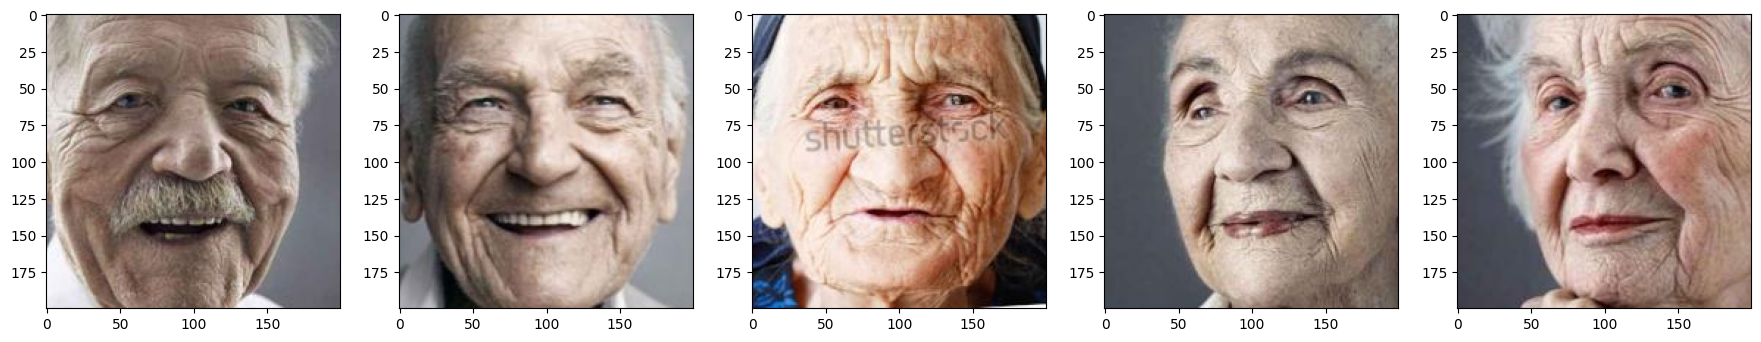

In [51]:
import matplotlib.image as mpim
import matplotlib.pyplot as plt
from PIL import Image
fig=plt.figure(figsize=(22,5))
for i in range (0 , 5):
  fig.add_subplot(1,5,i+1)
  img = mpim.imread(df.iloc[i , 0])
  plt.imshow(img)




In [52]:
list_images = []
import numpy as np
X = df['Images']
for im in X :
    image = Image.open(im)
    image = image.resize((168 , 168))
    image = image.convert('RGB')
    image = np.array((image))
    list_images.append(image)



In [53]:
X = np.array(list_images)

In [54]:
X.dtype

dtype('uint8')

In [55]:
X = X.astype('float32')
X = (X / 255)
print(X.dtype)
y_age = np.array(df['Ages'])
y_gender = np.array(df['Genders'])
y_race = np.array(df['Races'])

float32


In [56]:
np.save('Images.npy' , X)
np.save('y_age.npy' , y_age)
np.save('y_gender.npy' , y_gender)
np.save('y_race.npy' , y_race)


In [168]:
list_images[0]

array([[[106,  79,  50],
        [100,  73,  43],
        [104,  78,  44],
        ...,
        [150, 116,  80],
        [146, 112,  77],
        [150, 117,  82]],

       [[109,  82,  53],
        [102,  75,  45],
        [103,  77,  43],
        ...,
        [153, 119,  83],
        [143, 109,  74],
        [154, 122,  87]],

       [[110,  84,  54],
        [103,  77,  46],
        [102,  76,  42],
        ...,
        [163, 129,  93],
        [146, 112,  77],
        [153, 120,  85]],

       ...,

       [[  4,   4,   2],
        [  5,   5,   3],
        [  6,   6,   4],
        ...,
        [108,  77,  51],
        [ 79,  53,  34],
        [ 67,  48,  33]],

       [[  4,   4,   2],
        [  5,   5,   3],
        [  6,   6,   4],
        ...,
        [ 84,  58,  34],
        [ 64,  44,  27],
        [ 66,  50,  37]],

       [[  4,   4,   2],
        [  5,   5,   3],
        [  6,   6,   4],
        ...,
        [ 71,  46,  25],
        [ 63,  45,  31],
        [ 62,  48,  38]]

In [12]:
from sklearn.model_selection import train_test_split
X_train_age , X_test_age , y_train_age , y_test_age = train_test_split(X , y_age , test_size=0.2 , random_state=12)

In [13]:
# np.save('X_train_age.npy', X_train_age)
# np.save('X_test_age.npy', X_test_age)
# np.save('y_train_age.npy' , y_train_age)
# np.save('y_test_age.npy' , y_test_age)

# X_train_age = np.load('X_train_age.npy')
# X_test_age = np.load('X_test_age.npy')
# y_train_age = np.load('y_train_age.npy')
# y_test_age = np.load('y_test_age.npy')







In [14]:
import tensorflow as tf
from tensorflow import keras

In [18]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32 , kernel_size=(3,3) , activation='relu' , input_shape=(200,200,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3) , activation='relu' ))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128 , activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64 , activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1 , activation='relu') )

In [19]:
model.compile(optimizer='adam' , loss='mse' , metrics=['mae'])

In [20]:
history = model.fit(X_train_age , y_train_age , validation_split=0.1 , epochs=5)

Epoch 1/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 169s 412ms/step - loss: 615.6710 - mae: 19.0676 - val_loss: 266.1864 - val_mae: 12.0982
Epoch 2/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 173s 427ms/step - loss: 324.9471 - mae: 13.7641 - val_loss: 210.2306 - val_mae: 10.6664
Epoch 3/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 170s 421ms/step - loss: 273.7104 - mae: 12.6800 - val_loss: 259.0601 - val_mae: 11.9733
Epoch 4/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 170s 421ms/step - loss: 248.2226 - mae: 12.0260 - val_loss: 160.4634 - val_mae: 9.6354
Epoch 5/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 180s 445ms/step - loss: 238.9814 - mae: 11.6965 - val_loss: 217.2807 - val_mae: 11.0098


In [21]:
loss , accuracy = model.evaluate(X_test_age, y_test_age)
print('Test accuracy' , accuracy) 

113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 206.7265 - mae: 10.7644
Test accuracy 10.627824783325195


In [22]:
y_pred = model.predict(X_test_age)
y_pred

113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step


array([[44.6284  ],
       [47.204544],
       [ 8.92294 ],
       ...,
       [20.679592],
       [34.556614],
       [22.77889 ]], dtype=float32)

In [154]:
y_pred.shape

(4724, 1)

In [158]:
y_test_age

array([18,  4, 17, ...,  1, 35, 50], dtype=int64)

In [209]:
df2 = df[(df['Races'] != 3) & (df['Races'] !=2) & (df['Ages'] <= 70) & (df['Races'] !=4)].copy()

array([[<Axes: title={'center': 'Ages'}>,
        <Axes: title={'center': 'Genders'}>],
       [<Axes: title={'center': 'Races'}>, <Axes: >]], dtype=object)

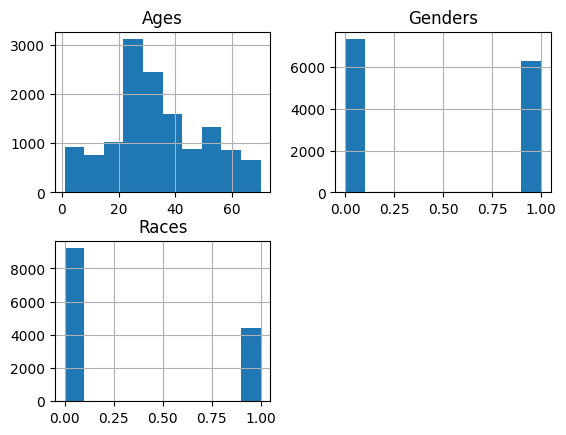

In [210]:
df2.hist()

array([[<Axes: title={'center': 'Ages'}>,
        <Axes: title={'center': 'Genders'}>],
       [<Axes: title={'center': 'Races'}>, <Axes: >]], dtype=object)

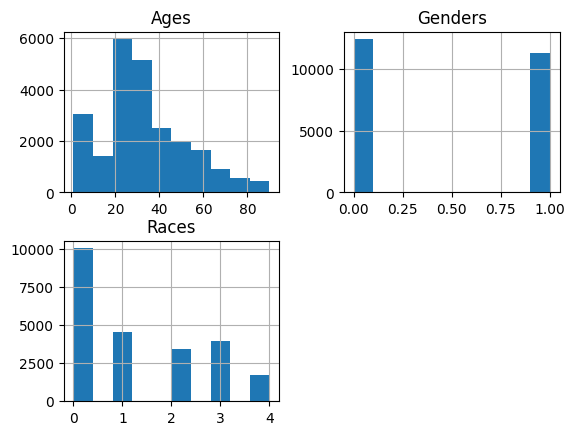

In [212]:
df.hist()